# Linear Algebra for Data Science

## Chapter 14

In [373]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from latools import matrix, imatrix, column
import seaborn as sns

#plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.figsize"] = (9,8)

In [314]:
# Let's consider SVD as composition

A = imatrix(2)
x_0 = np.array([[1], [0]])
y_0 = np.array([[0], [1]])

A,x,y

(array([[-5,  1],
        [-2, -3]]),
 array([[-9],
        [-8]]),
 array([[-4],
        [ 1]]))

In [315]:
i = np.array([[1],[0]])
j = np.array([[0],[1]])

In [316]:
x = A @ x_0
y = A @ y_0

In [317]:
U, s, V = np.linalg.svd(A)

In [324]:
U, s, V

(array([[-0.91663818, -0.39971796],
        [-0.39971796,  0.91663818]]),
 array([5.39003586, 3.15396788]),
 array([[ 0.99862542,  0.05241444],
        [ 0.05241444, -0.99862542]]))

In [318]:
x_1 = V @ x_0
y_1 = V @ y_0

i_1 = V @ i
j_1 = V @ j

In [319]:
S = np.diag(s)

In [320]:
x_2 = S @ x_1
y_2 = S @ y_1

i_2 = S @ i
j_2 = S @ j

In [321]:
x_3 = U @ x_2
y_3 = U @ y_2

i_3 = U @ i
j_3 = U @ j

(-5.300000000000002,
 1.2999999999999998,
 -3.1523211917272134,
 3.447678808272788)

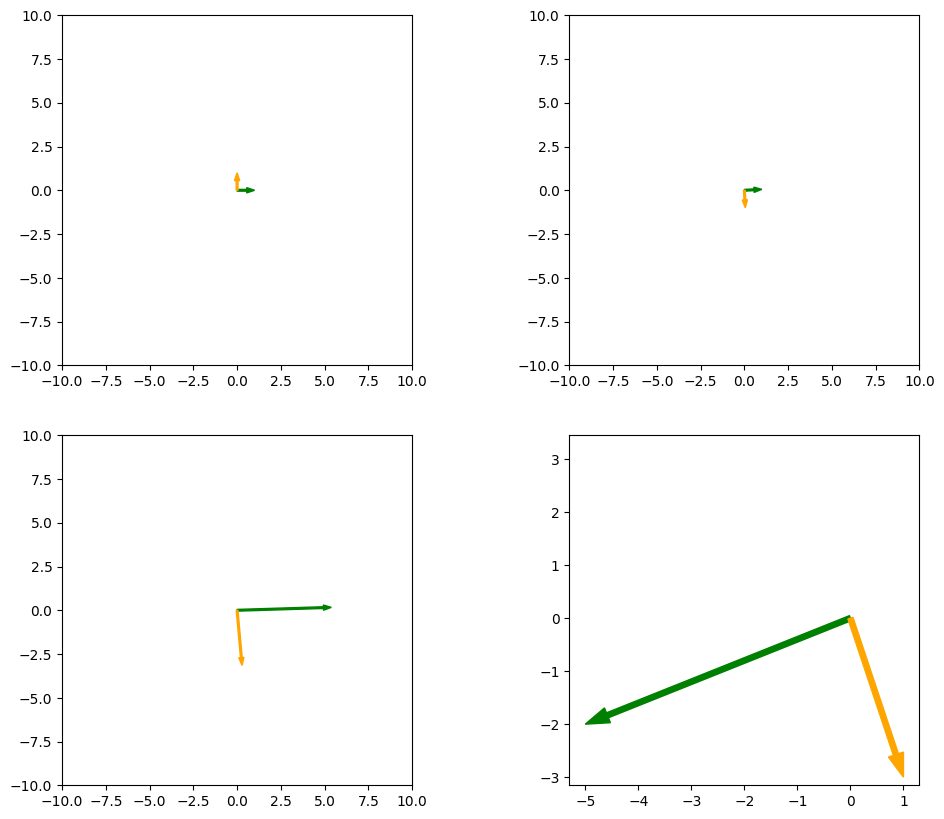

In [322]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


ax1.arrow(0,0, x_0[0,0], x_0[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, y_0[0,0], y_0[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, x_1[0,0], x_1[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, y_1[0,0], y_1[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax2.axis('square')
ax2.axis([-10,10,-10,10])

ax3.arrow(0,0, x_2[0,0], x_2[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax3.arrow(0,0, y_2[0,0], y_2[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax3.axis('square')
ax3.axis([-10,10,-10,10])

ax4.arrow(0,0, x_3[0,0], x_3[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax4.arrow(0,0, y_3[0,0], y_3[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax4.axis('square')
ax4.axis([-10,10,-10,10])



#plt.arrow(0,0, x_2[0,0], x_2[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
#plt.arrow(0,0, y_2[0,0], y_2[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

plt.axis('square')

(-10.0, 10.0, -10.0, 10.0)

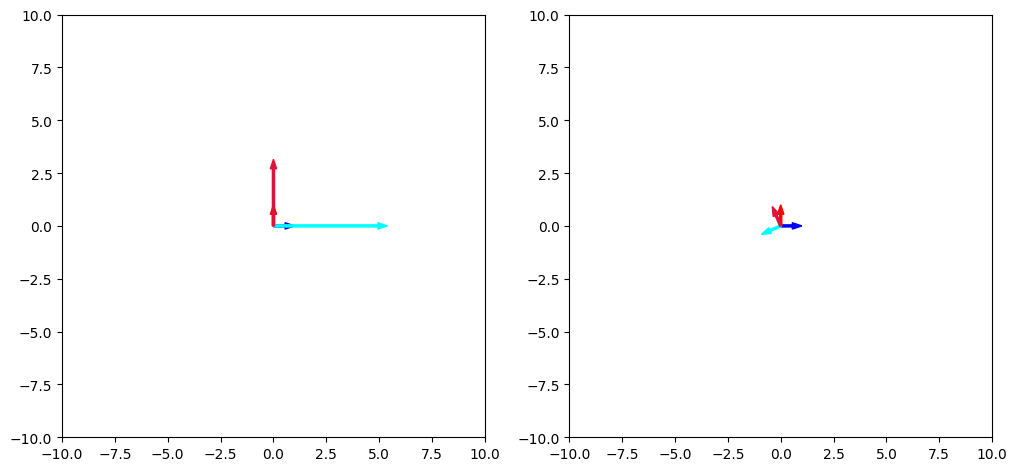

In [323]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.arrow(0,0, i[0,0], i[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, j[0,0], j[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

ax1.arrow(0,0, i_2[0,0], i_2[1,0], color = 'cyan', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, j_2[0,0], j_2[1,0], color = 'crimson', length_includes_head=True, width=0.1, head_width=0.3)

ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, i[0,0], i[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, j[0,0], j[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

ax2.arrow(0,0, i_3[0,0], i_3[1,0], color = 'cyan', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, j_3[0,0], j_3[1,0], color = 'crimson', length_includes_head=True, width=0.1, head_width=0.3)

ax2.axis('square')
ax2.axis([-10,10,-10,10])



(-10.0, 10.0, -10.0, 10.0)

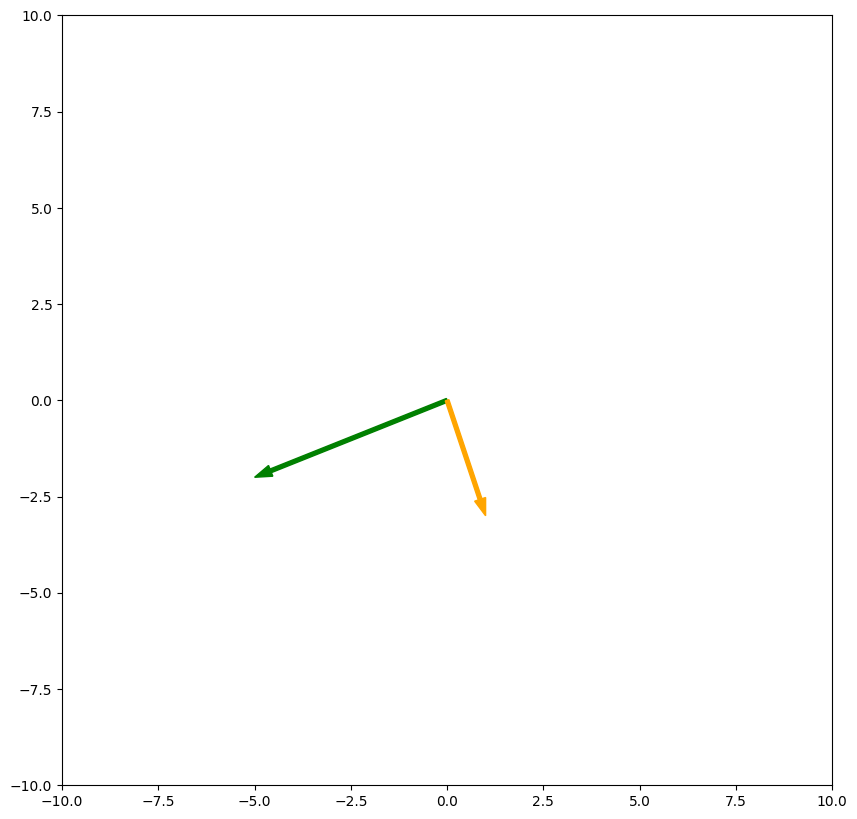

In [325]:
plt.arrow(0,0, x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0, y[0,0], y[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
plt.axis('square')
plt.axis([-10,10,-10,10])

## Eigenvector decomposition

In [363]:
A = imatrix(2)
x_0 = np.array([[1], [0]])
y_0 = np.array([[0], [1]])

In [364]:
l, V = np.linalg.eig(A)
l = np.diag(l)
l ,V

(array([[-2.,  0.],
        [ 0., -4.]]),
 array([[0.        , 0.37139068],
        [1.        , 0.92847669]]))

In [365]:
x = A @ x_0
y = A @ y_0

In [366]:
x_1 = np.linalg.inv(V) @ x_0
y_1 = np.linalg.inv(V) @ y_0

In [367]:
x_2 = l @ x_1
y_2 = l @ y_1

In [368]:
x_3 = V @ x_2
y_3 = V @ y_2

In [369]:
A @ x

array([[16],
       [30]])

(-10.0, 10.0, -10.0, 10.0)

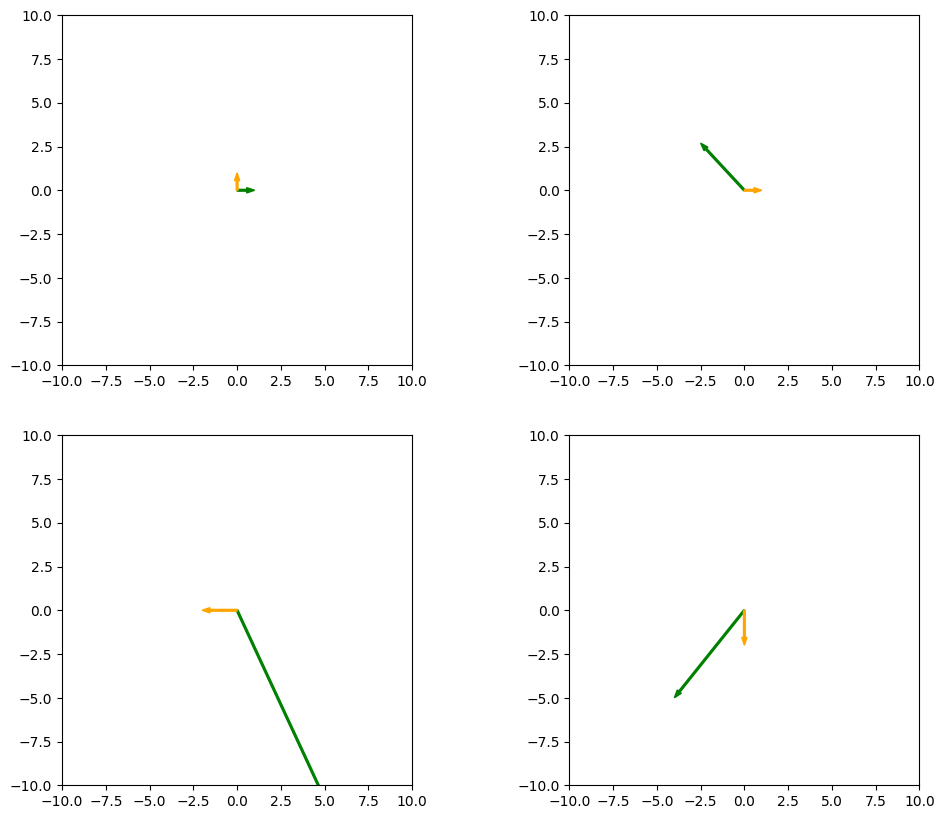

In [370]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


ax1.arrow(0,0, x_0[0,0], x_0[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, y_0[0,0], y_0[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, x_1[0,0], x_1[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, y_1[0,0], y_1[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax2.axis('square')
ax2.axis([-10,10,-10,10])

ax3.arrow(0,0, x_2[0,0], x_2[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax3.arrow(0,0, y_2[0,0], y_2[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax3.axis('square')
ax3.axis([-10,10,-10,10])

ax4.arrow(0,0, x_3[0,0], x_3[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax4.arrow(0,0, y_3[0,0], y_3[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax4.axis('square')
ax4.axis([-10,10,-10,10])

(-10.0, 10.0, -10.0, 10.0)

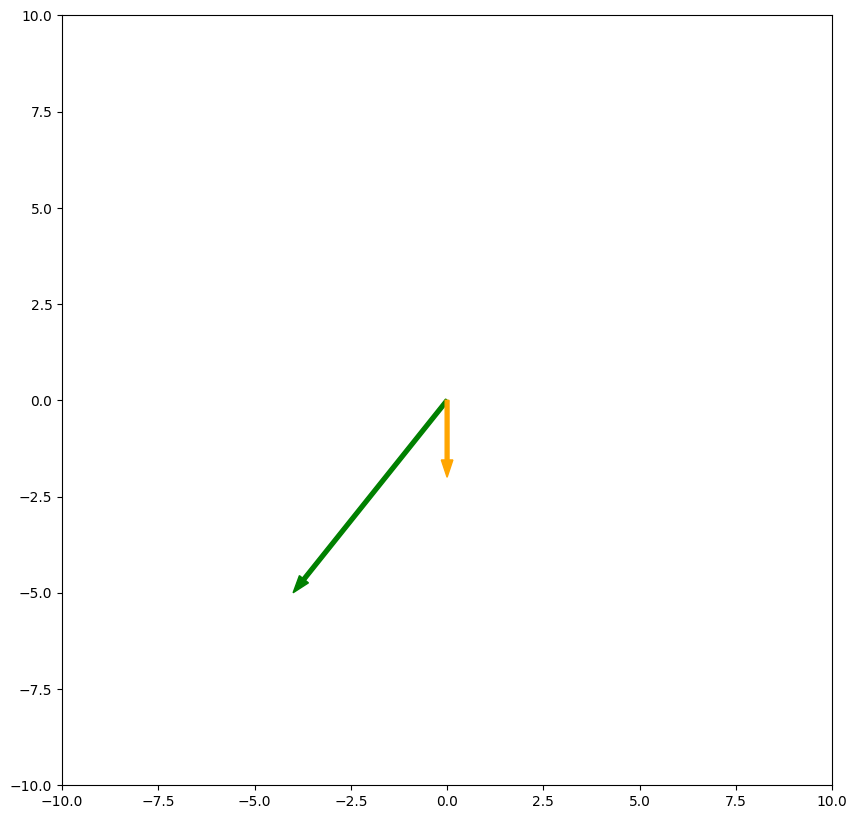

In [371]:
plt.arrow(0,0, x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0, y[0,0], y[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
plt.axis('square')
plt.axis([-10,10,-10,10])

## Exercises

### Exercise 14.1

In [37]:
def symmetrical_matrix(s=2, min=-3, max=3):
    '''Creates symmetrical matrix'''
    A = imatrix(s=s, min=min, max=max)
    return A @ A.T

In [38]:
A = symmetrical_matrix(5)

In [39]:
l, W = np.linalg.eig(A)

In [40]:
U, s, V = np.linalg.svd(A)

In [41]:
W, V.T

(array([[ 0.55310336, -0.35323733, -0.46059029,  0.59589157, -0.04549588],
        [-0.24367185, -0.1034001 ,  0.35389492,  0.37624797, -0.8143269 ],
        [-0.57637749,  0.38785956, -0.67615265,  0.23763721, -0.06082842],
        [ 0.24399229, -0.08479929, -0.43767419, -0.65750616, -0.55624078],
        [-0.49290715, -0.84077693, -0.11778736, -0.12068517,  0.14730217]]),
 array([[-0.55310336, -0.59589157, -0.04549588,  0.46059029,  0.35323733],
        [ 0.24367185, -0.37624797, -0.8143269 , -0.35389492,  0.1034001 ],
        [ 0.57637749, -0.23763721, -0.06082842,  0.67615265, -0.38785956],
        [-0.24399229,  0.65750616, -0.55624078,  0.43767419,  0.08479929],
        [ 0.49290715,  0.12068517,  0.14730217,  0.11778736,  0.84077693]]))

<AxesSubplot:>

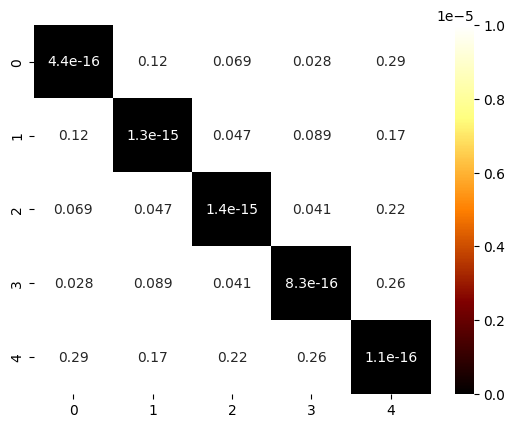

In [59]:
# difference matrix between V.T and W

sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in V.T] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

<AxesSubplot:>

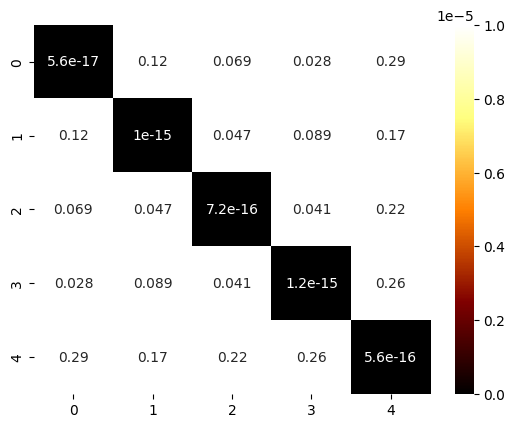

In [60]:
sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in U] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

In [61]:
B = imatrix(5)
B = B.T + B

In [62]:
l, W = np.linalg.eig(B)
U, s, V = np.linalg.svd(B)

<AxesSubplot:>

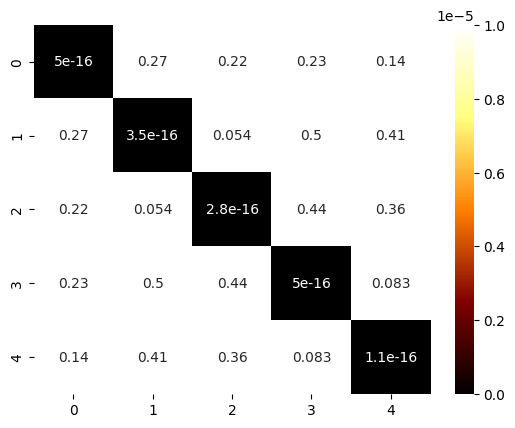

In [63]:
# difference matrix between V.T and W

sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in V.T] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

In [64]:
s, l

(array([26.28725029, 22.25939708, 20.17614162, 12.37152755,  4.16753273]),
 array([-26.28725029, -20.17614162,  22.25939708,  -4.16753273,
         12.37152755]))

In [65]:
V, W

(array([[-0.58878628, -0.58999854, -0.21311058, -0.45069586,  0.23809569],
        [-0.69232477,  0.22197422, -0.21662279,  0.48861619, -0.4309787 ],
        [ 0.28976743, -0.7700665 , -0.01511866,  0.46191697, -0.33081198],
        [ 0.17614156,  0.05941725, -0.77507471,  0.32686402,  0.50780198],
        [-0.24295292, -0.07807909,  0.55379514,  0.48777052,  0.62471464]]),
 array([[ 0.58878628,  0.28976743,  0.69232477, -0.24295292,  0.17614156],
        [ 0.58999854, -0.7700665 , -0.22197422, -0.07807909,  0.05941725],
        [ 0.21311058, -0.01511866,  0.21662279,  0.55379514, -0.77507471],
        [ 0.45069586,  0.46191697, -0.48861619,  0.48777052,  0.32686402],
        [-0.23809569, -0.33081198,  0.4309787 ,  0.62471464,  0.50780198]]))

### Exercise 14.2

In [69]:
A = np.random.randint(-9, 9, (3,5))

In [71]:
U,s,Vt = np.linalg.svd(A, full_matrices=False)

In [72]:
U,s,Vt

(array([[-0.56082839, -0.71924284,  0.4100747 ],
        [ 0.37203347,  0.223552  ,  0.90089711],
        [-0.73963681,  0.65781019,  0.1422081 ]]),
 array([16.86670281, 12.90707533,  3.73118516]),
 array([[ 0.49408946,  0.61708277,  0.2398699 ,  0.02008514,  0.56315493],
        [-0.35100073,  0.12368219, -0.61329935, -0.52968454,  0.45254768],
        [ 0.27142683, -0.6631298 ,  0.37616228, -0.47530019,  0.3452217 ]]))

In [73]:
U_,s_,Vt_ = np.linalg.svd(A, full_matrices=True)

In [74]:
U_, s_, Vt_

(array([[-0.56082839, -0.71924284,  0.4100747 ],
        [ 0.37203347,  0.223552  ,  0.90089711],
        [-0.73963681,  0.65781019,  0.1422081 ]]),
 array([16.86670281, 12.90707533,  3.73118516]),
 array([[ 0.49408946,  0.61708277,  0.2398699 ,  0.02008514,  0.56315493],
        [-0.35100073,  0.12368219, -0.61329935, -0.52968454,  0.45254768],
        [ 0.27142683, -0.6631298 ,  0.37616228, -0.47530019,  0.3452217 ],
        [ 0.30285886, -0.4009448 , -0.50262358,  0.60060064,  0.36628976],
        [-0.68357741, -0.05842695,  0.41496725,  0.36386738,  0.47403684]]))

### Exercise 14.3

Prove that U and V are rotation matrices

I believe that might work:

The norm is in essence matrix multiplication:

$$ |x|^2 = x^t\cdot x $$

So let us consider

$$(Av)^t \cdot Av $$

$$ (Av)^t \cdot Av = v^t\cdot A^t \cdot A \cdot v = v^t\cdot (A^t \cdot A) \cdot v = v^t \cdot v$$

Which is true if 

$$ A^tA = E $$

That is true for orthogonal matrices

In [90]:
A = np.random.randint(-9, 9, (2,3))

In [91]:
A

array([[-1, -4, -9],
       [-8,  3,  2]])

In [92]:
U, s, V = np.linalg.svd(A)

In [93]:
U

array([[-0.84579241,  0.53351214],
       [ 0.53351214,  0.84579241]])

In [94]:
V

array([[-0.32355477,  0.47117424,  0.82055295],
       [-0.91880011,  0.0507652 , -0.39144507],
       [-0.22609437, -0.88057807,  0.41648963]])

In [84]:
x = column(2)

In [85]:
x

array([[8.12393003],
       [8.5307175 ]])

In [102]:
U @ x

array([[-2.31991694],
       [11.54943139]])

In [115]:
U[0,:] @ U[1,:].T

-1.2969121225721723e-17

In [116]:
U @ U.T

array([[ 1.00000000e+00, -1.29691212e-17],
       [-1.29691212e-17,  1.00000000e+00]])

In [118]:
(2*U) @ (2 * U).T

array([[ 4.00000000e+00, -5.18764849e-17],
       [-5.18764849e-17,  4.00000000e+00]])

In [109]:
np.linalg.norm(x), np.linalg.norm(U @ x), np.linalg.norm(2*U @ x)

(11.78012648923887, 11.780126489238869, 23.560252978477738)

(-12.958139138162759,
 12.958139138162759,
 -12.958139138162759,
 12.958139138162759)

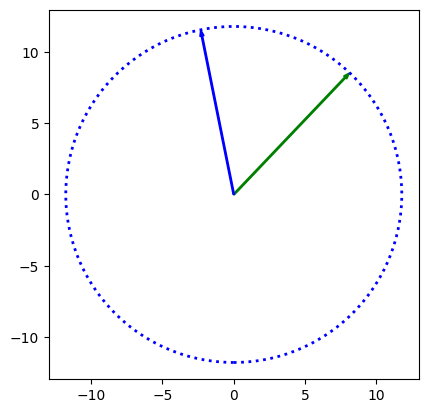

In [121]:
plt.arrow(0,0,x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0,(U @ x)[0,0], (U @ x)[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)

r = np.linalg.norm(x)

circle1 = plt.Circle((0, 0), r, color='b', fill=False, linestyle=':', linewidth=2)
plt.gca().add_patch(circle1)

plt.axis('square')
#plt.axis([-,10,0,10])

### Exercise 14.4

In [134]:
U,_ = np.linalg.qr(imatrix(5))
V,_ = np.linalg.qr(imatrix(7))

sigma = np.array([[42, 0, 0, 0, 0,0,0],
                  [0, 14, 0, 0, 0,0,0],
                  [0, 0, 9, 0, 0,0,0],
                  [0, 0, 0, 2, 0,0,0],
                  [0, 0, 0, 0, 1,0,0]])

In [135]:
U, V

(array([[-0.77174363,  0.2766139 ,  0.48075333,  0.25997676,  0.17083568],
        [ 0.42874646, -0.36332673,  0.54678088,  0.28637061,  0.55062937],
        [-0.42874646, -0.6390735 , -0.51377943,  0.12121727,  0.35930294],
        [ 0.08574929,  0.55236068, -0.30625019, -0.24656316,  0.73004258],
        [ 0.17149859,  0.27921529, -0.33488568,  0.88029367, -0.0745768 ]]),
 array([[-0.2773501 , -0.06123307,  0.73824034,  0.29275278, -0.07973883,
         -0.46014606,  0.26557817],
        [-0.06933752, -0.50647565,  0.13644354, -0.78293052, -0.1311297 ,
         -0.24610983, -0.17120933],
        [-0.        ,  0.5419778 , -0.05587833, -0.42942826,  0.53443154,
         -0.31781769,  0.363461  ],
        [ 0.69337525,  0.25470351,  0.00421475, -0.06214832, -0.5821521 ,
         -0.30462278,  0.13704237],
        [ 0.20801257, -0.58073703, -0.42246786,  0.26004141,  0.25026244,
         -0.3564509 ,  0.42858618],
        [ 0.06933752,  0.0999923 , -0.11290805,  0.21311907,  0.22538746,

In [136]:
B = U @ sigma @ V.T

In [137]:
B

array([[ 12.08548153,   0.44695048,   1.72510432, -21.60169993,
        -10.64128134,  -2.19943574, -18.72679253],
       [ -0.92620776,   1.47846278,  -2.98346664,  10.85487941,
          4.9074796 ,   0.43051028,  14.86417826],
       [  2.17088341,   4.91219585,  -4.50279428, -15.00841634,
          3.55657625,  -1.48848085, -11.68967453],
       [ -3.70973957,  -4.25203762,   4.94707604,   4.06083941,
         -2.52282031,   1.39361326,  -0.17593324],
       [ -3.94076877,  -4.25912969,   1.49111234,   5.91127463,
          0.94066079,   1.58901304,   2.25959331]])

In [138]:
u, s, v = np.linalg.svd(B)

u,s,v

(array([[ 0.77174363, -0.2766139 , -0.48075333, -0.25997676, -0.17083568],
        [-0.42874646,  0.36332673, -0.54678088, -0.28637061, -0.55062937],
        [ 0.42874646,  0.6390735 ,  0.51377943, -0.12121727, -0.35930294],
        [-0.08574929, -0.55236068,  0.30625019,  0.24656316, -0.73004258],
        [-0.17149859, -0.27921529,  0.33488568, -0.88029367,  0.0745768 ]]),
 array([42., 14.,  9.,  2.,  1.]),
 array([[ 2.77350098e-01,  6.93375245e-02,  1.70917962e-17,
         -6.93375245e-01, -2.08012574e-01, -6.93375245e-02,
         -6.24037721e-01],
        [ 6.12330684e-02,  5.06475646e-01, -5.41977797e-01,
         -2.54703508e-01,  5.80737027e-01, -9.99922979e-02,
          1.84024913e-01],
        [-7.38240343e-01, -1.36443537e-01,  5.58783288e-02,
         -4.21475394e-03,  4.22467864e-01,  1.12908052e-01,
         -4.91952113e-01],
        [-2.92752781e-01,  7.82930524e-01,  4.29428260e-01,
          6.21483162e-02, -2.60041405e-01, -2.13119074e-01,
         -1.81338600e-03],


### Exercise 14.5

<AxesSubplot:>

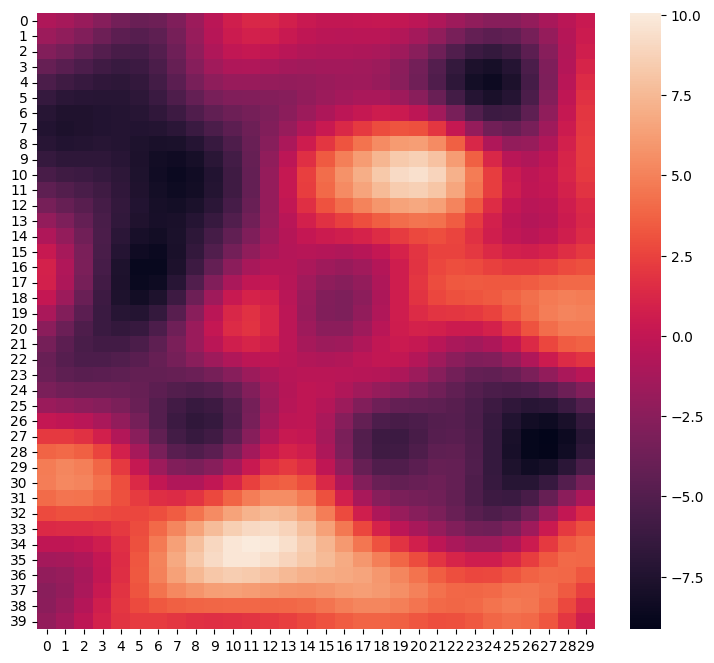

In [375]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )


# now for the matrix
from scipy.signal import convolve2d
B = np.random.randn(m,n)
A = convolve2d(B,g2d,mode='same')

sns.heatmap(A)

<AxesSubplot:>

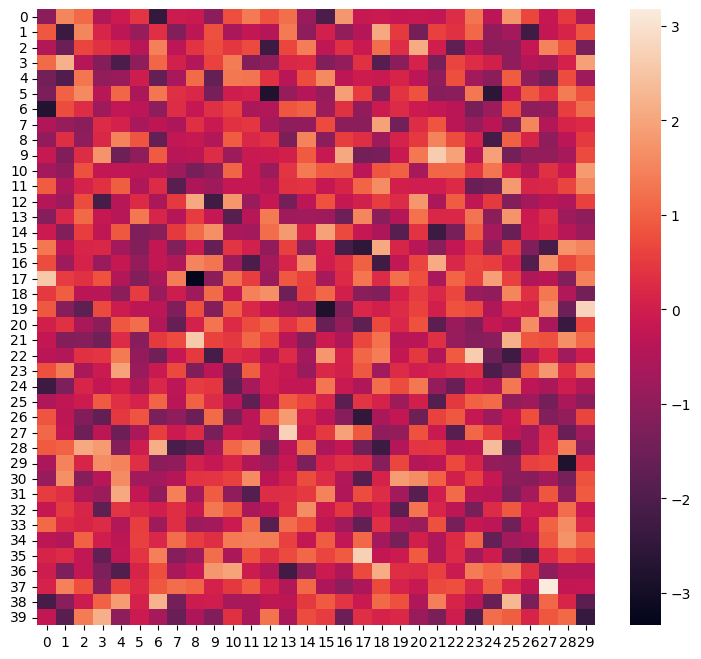

In [377]:
sns.heatmap(B)

In [378]:
U, s, V = np.linalg.svd(A)

In [389]:
S = np.zeros((40, 30))

np.fill_diagonal(S, s)

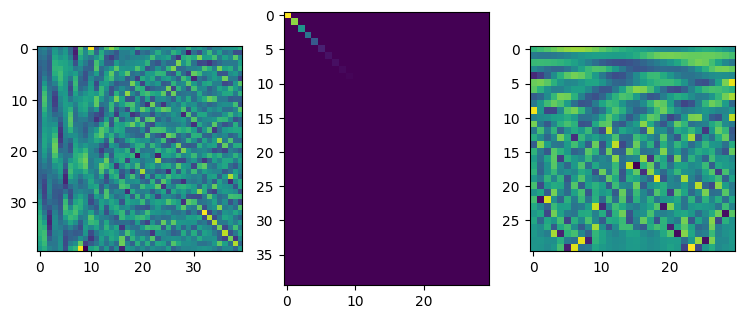

In [396]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(U)
ax2.imshow(S)
ax3.imshow(V)